In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
transactions = pd.read_excel(r'C:\Users\saori\OneDrive\Escritorio\Code\Projecto BasketMarket\Assignment-1_Data.xlsx',parse_dates=['Date'])

In [3]:
#hacemos una copia del data Set para no cargar la memoria y no modificar el dataset original
df = transactions.copy()

In [4]:
#Previsualizacion de datos del Dataset transactions_supermarket.csv
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
#Informacion de los datos de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


In [6]:
#Revisamos las columnas con valores nulos

df.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

In [7]:
#Eliminamos valores nulos
df_clean = df.dropna(subset=['Itemname'])
df_clean['CustomerID'] = df['CustomerID'].fillna('0000')
df_clean.isnull().sum()

C:\Users\saori\AppData\Local\Temp\ipykernel_15628\3050908591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['CustomerID'] = df['CustomerID'].fillna('0000')


BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

In [8]:
#Estadisticas de las principales columnas numericas del dataset:
df_clean.describe()

,Quantity,Date,Price
count,520609.000000,520609,520609.000000
mean,10.145545,2011-07-04 15:42:59.472502528,3.837497
min,-9600.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 10:15:00,1.250000
50%,3.000000,2011-07-20 11:50:00,2.080000
75%,10.000000,2011-10-19 15:26:00,4.130000
max,80995.000000,2011-12-09 12:50:00,13541.330000
std,160.818639,NaN,41.958621


In [9]:
#Mostramos los renglones en donde la cantidad es menor a 0
negativos = df_clean[df_clean['Quantity']<=0]
negativos.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
7122,537032,?,-30,2010-12-03 16:50:00,0.0,0000,United Kingdom
12926,537425,check,-20,2010-12-06 15:35:00,0.0,0000,United Kingdom
12927,537426,check,-35,2010-12-06 15:36:00,0.0,0000,United Kingdom
12973,537432,damages,-43,2010-12-06 16:10:00,0.0,0000,United Kingdom
20844,538072,faulty,-13,2010-12-09 14:10:00,0.0,0000,United Kingdom


In [10]:
#mostramos los estadisticos de los negativos
print(negativos.describe())

#Y sacamos el % de participacion contra el data set limpio
participacion_negativos = (negativos.count()/df_clean.count())*100
print(participacion_negativos)

          Quantity                           Date  Price
count   473.000000                            473  473.0
mean   -339.114165  2011-08-15 16:20:03.044397312    0.0
min   -9600.000000            2010-12-03 16:50:00    0.0
25%    -256.000000            2011-06-02 11:12:00    0.0
50%     -71.000000            2011-10-04 11:41:00    0.0
75%     -28.000000            2011-11-09 12:15:00    0.0
max      -1.000000            2011-12-08 15:24:00    0.0
std     921.313572                            NaN    0.0
BillNo        0.090855
Itemname      0.090855
Quantity      0.090855
Date          0.090855
Price         0.090855
CustomerID    0.090855
Country       0.090855
dtype: float64


In [11]:
#Eliminamos todas las cantiidades negativas ya que por columna solo representan el 0.09% del data Set
df_clean = df_clean[df_clean['Quantity']>=0]
df_clean.describe()

,Quantity,Date,Price
count,520136.000000,520136,520136.000000
mean,10.463154,2011-07-04 14:47:57.501191936,3.840986
min,1.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 10:14:00,1.250000
50%,3.000000,2011-07-20 11:38:00,2.080000
75%,10.000000,2011-10-19 15:08:00,4.130000
max,80995.000000,2011-12-09 12:50:00,13541.330000
std,158.129245,NaN,41.977535


In [12]:
#revisemos ahora los negativos o ceros en precio
nega_prec = df_clean[df_clean['Price']<=0]
nega_prec.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
6275,536941,amazon,20,2010-12-03 12:08:00,0.0,0000,United Kingdom
6276,536942,amazon,15,2010-12-03 12:08:00,0.0,0000,United Kingdom
9097,537197,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
14038,537534,CREAM SWEETHEART LETTER RACK,1,2010-12-07 11:48:00,0.0,0000,United Kingdom
14039,537534,ZINC WILLIE WINKIE CANDLE STICK,1,2010-12-07 11:48:00,0.0,0000,United Kingdom


In [13]:
#Validamos estadisticos y sacamos la participacion porcentual con respecto al data set:
print(nega_prec.describe())
part_nega_pric = (nega_prec.count()/df_clean.count())*100
print(part_nega_pric)

           Quantity                           Date         Price
count    585.000000                            585    585.000000
mean      68.006838  2011-05-19 00:22:14.974358784    -37.819009
min        1.000000            2010-12-03 12:08:00 -11062.060000
25%        1.000000            2011-01-11 14:42:00      0.000000
50%        2.000000            2011-05-17 14:35:00      0.000000
75%        8.000000            2011-08-26 14:19:00      0.000000
max    12540.000000            2011-12-08 13:58:00      0.000000
std      580.456215                            NaN    646.250554
BillNo        0.112471
Itemname      0.112471
Quantity      0.112471
Date          0.112471
Price         0.112471
CustomerID    0.112471
Country       0.112471
dtype: float64


In [14]:
#Eliminamos estos registros para no meter ruido a nuestro proyecto ya que solo representan el 0.11%
df_clean = df_clean[df_clean['Price']>0]
df_clean.describe()

,Quantity,Date,Price
count,519551.000000,519551,519551.000000
mean,10.398361,2011-07-04 16:03:31.051080704,3.887894
min,1.000000,2010-12-01 08:26:00,0.001000
25%,1.000000,2011-03-28 10:52:00,1.250000
50%,3.000000,2011-07-20 11:55:00,2.080000
75%,10.000000,2011-10-19 15:08:00,4.130000
max,80995.000000,2011-12-09 12:50:00,13541.330000
std,157.004952,NaN,35.954045


In [15]:
#Creamos la columna Sales la cual es el monto total por transaccion

df_clean['Sales'] = df_clean['Quantity']*df_clean['Price']
df_clean.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Sales
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


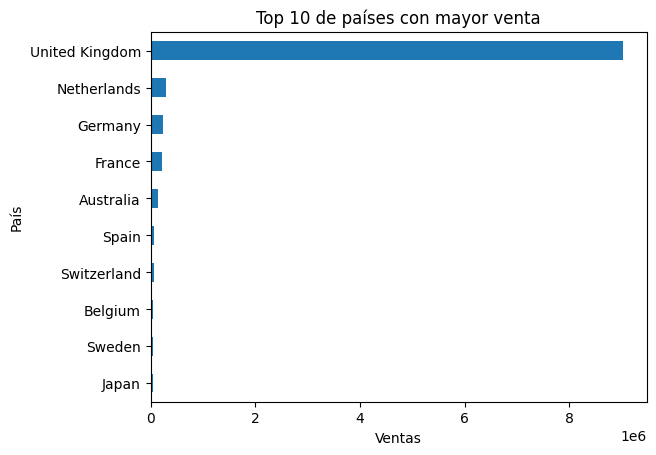

In [59]:
# Top 10 de paises con mayor venta
(df_clean
 .groupby('Country')['Sales'].sum() 
 .sort_values(ascending=True)     
 .tail(10)                         
 .plot(kind='barh')              
)

plt.title('Top 10 de países con mayor venta')
plt.xlabel('Ventas') 
plt.ylabel('País')   
plt.show()           

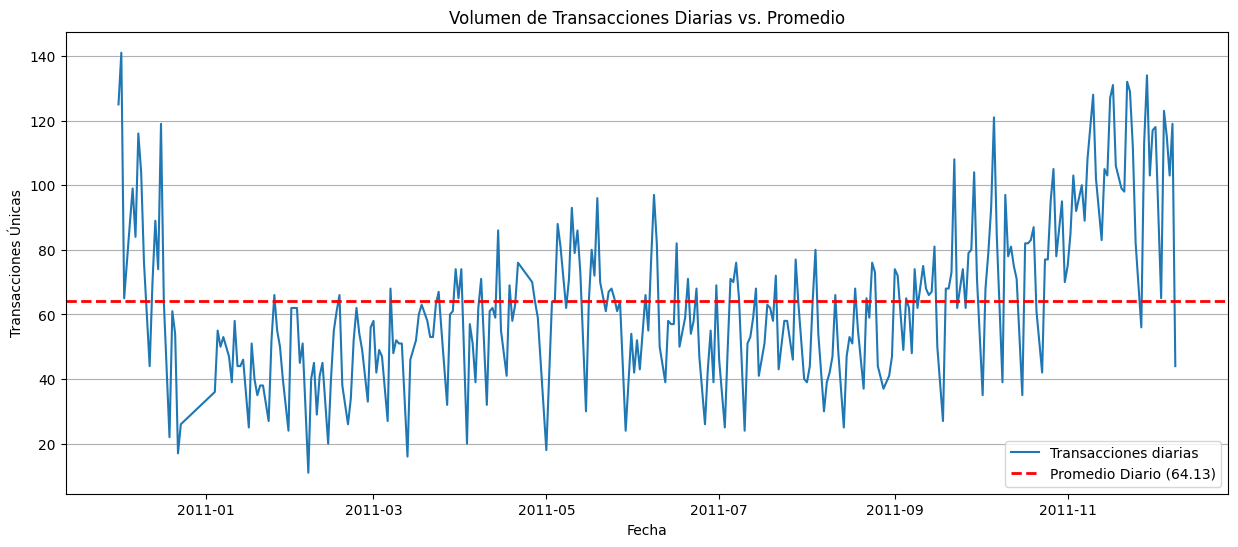

In [66]:
#Validamos las transacciones atravez del tiempo para ver si podemos detectar algun patron importante

#Transacciones promedio
transacciones_diarias = df_clean.groupby(df_clean['Date'].dt.date)['BillNo'].nunique()
prom = transacciones_diarias.mean()
plt.figure(figsize=(15, 6)) 
ax = transacciones_diarias.plot(kind='line', label='Transacciones diarias') 
ax.axhline(
    y=prom, 
    color='r',
    linestyle='--',
    linewidth=2,
    label=f'Promedio Diario ({prom:.2f})' 
)

plt.title('Volumen de Transacciones Diarias vs. Promedio')
plt.xlabel('Fecha')
plt.ylabel('Transacciones Únicas')
plt.grid(axis='y')
plt.legend('Transacciones promedio diarias')
ax.legend() 
plt.show()

C:\Users\saori\AppData\Local\Temp\ipykernel_15628\1333754909.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Itemname', y='Quantity',data=qty_sales_top10, palette='viridis')


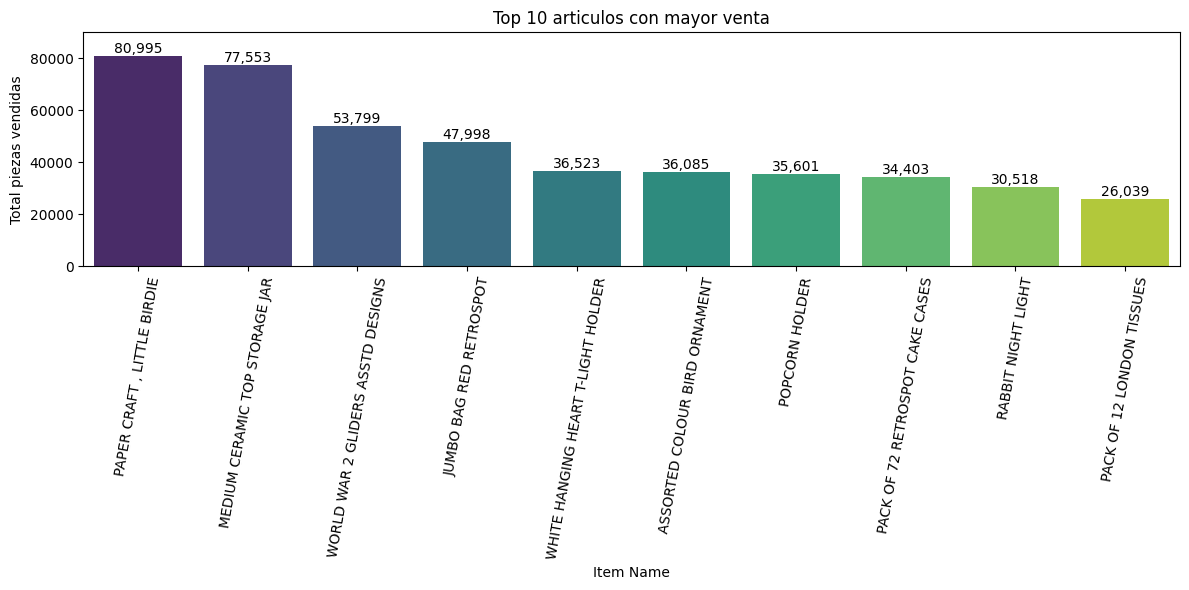

In [16]:
#Top 10 de articulos con mas venta en PZA

qty_sales_top10 = df_clean.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Itemname', y='Quantity',data=qty_sales_top10, palette='viridis')
plt.xticks(rotation=80)
plt.xlabel('Item Name')
plt.ylabel('Total piezas vendidas')
plt.ylim(top=90000)
plt.title('Top 10 articulos con mayor venta')
for i, v in enumerate(qty_sales_top10['Quantity']):
    plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

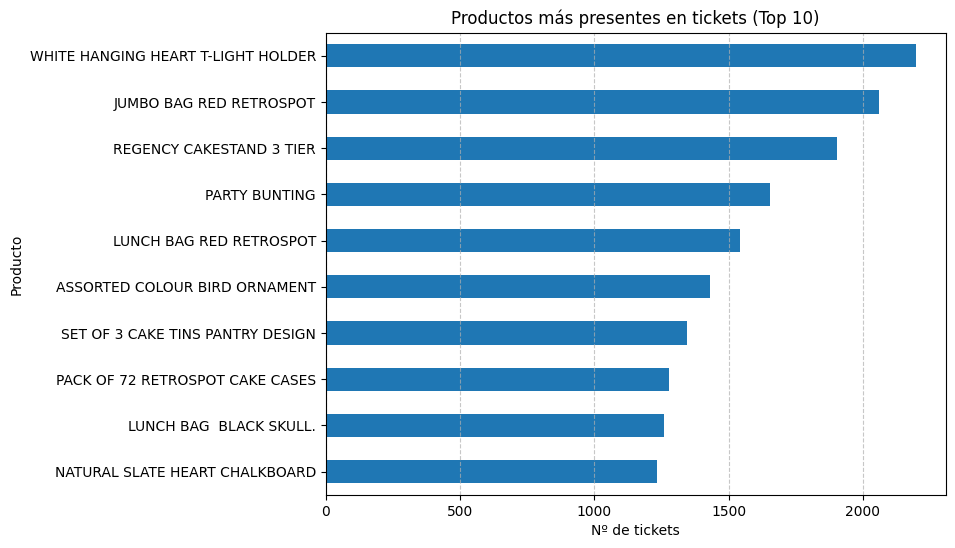

In [17]:
#Objetivo: construir una matriz ticket × producto en formato binario (1 si el producto aparece en el ticket, 0 si no aparece).

# Top N productos por frecuencia (líneas)
TOP_N = 10
product_freq = df_clean["Itemname"].value_counts()
top_products = product_freq.head(TOP_N).index.tolist()

# Filtrar solo esos productos y quedarnos con ticket/producto
df_top = df_clean.loc[df["Itemname"].isin(top_products), ["BillNo", "Itemname"]]

# Matriz binaria: tickets (filas) × productos (columnas)
basket = pd.crosstab(df_top["BillNo"], df_top["Itemname"])
basket = (basket > 0).astype(int)

#Visualizamos el top 10 de los datos para una mejor interpretacion:
product_ticket_counts = basket.sum(axis=0).sort_values(ascending=True)
# Gráfico de barras
plt.figure(figsize=(8,6))
product_ticket_counts.sort_values().plot(kind="barh")
plt.title("Productos más presentes en tickets (Top 10)")
plt.xlabel("Nº de tickets")
plt.ylabel("Producto")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [18]:
from mlxtend.frequent_patterns import apriori, association_rules

# convertir a 0/1 (si el item aparece en el ticket)
basket = (basket > 0).astype(int)

# Itemsets frecuentes
frequent_itemsets = apriori(basket, 
                            min_support=0.01,  # aparece en >=1% de los tickets
                            use_colnames=True)

# Reglas de asociación
rules = association_rules(frequent_itemsets, 
                          metric="lift", 
                          min_threshold=1.0)

#Ordenar por lift (más interesantes primero)
rules = rules.sort_values(by="lift", ascending=False)

print(rules.shape)

(334, 14)


c:\Users\saori\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


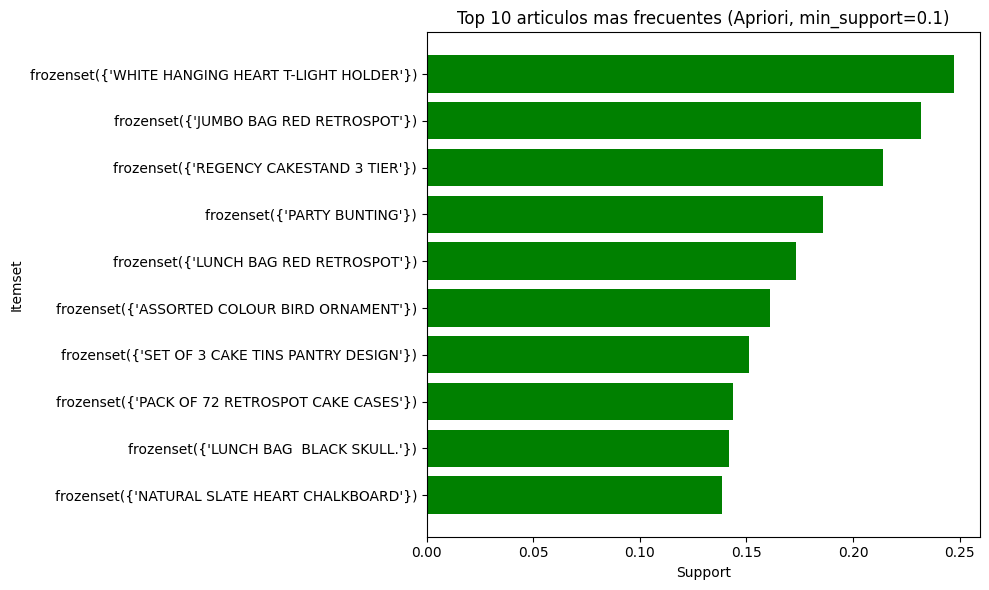

In [19]:
#visualicemos el top 10 de los items mas frecuentes:

top_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_itemsets['itemsets'].astype(str), top_itemsets['support'], color='green')
plt.xlabel('Support')
plt.ylabel('Itemset')
plt.title('Top 10 articulos mas frecuentes (Apriori, min_support=0.1)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


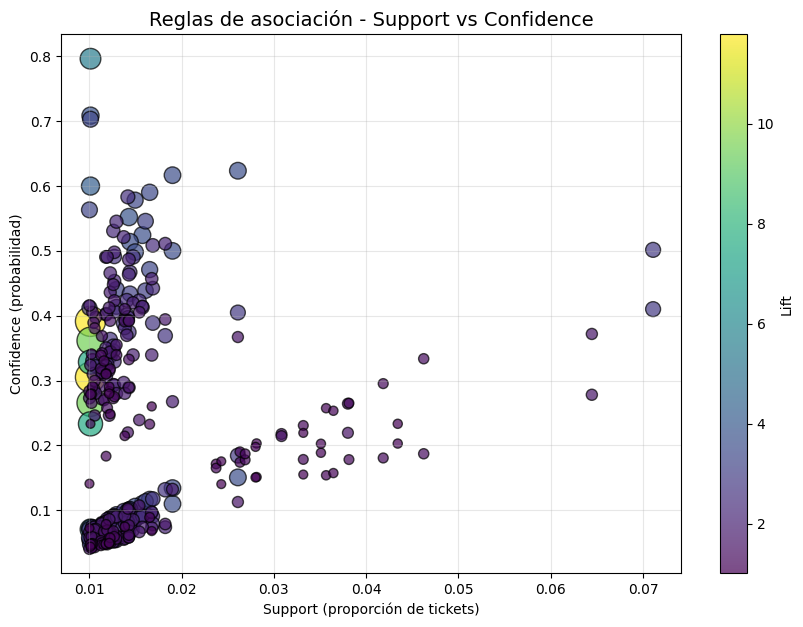

In [20]:
# El objetivo es ver de un vistazo cuáles son las reglas más fuertes y cómo se relacionan support(X), confidence(Y) y lift (Cuánto más probable es que ocurra Y dado X).

# Tomamos solo columnas que nos interesan
rules_plot = rules.copy()

plt.figure(figsize=(10,7))
scatter = plt.scatter(rules_plot["support"],
                      rules_plot["confidence"],
                      c=rules_plot["lift"],
                      s=rules_plot["lift"]*40,   # tamaño proporcional a lift
                      cmap="viridis", alpha=0.7, edgecolors="k")

plt.colorbar(scatter, label="Lift")
plt.title("Reglas de asociación - Support vs Confidence", fontsize=14)
plt.xlabel("Support (proporción de tickets)")
plt.ylabel("Confidence (probabilidad)")
plt.grid(alpha=0.3)
plt.show()


### Deacuerdo con las estimaciones e informacion encontrada haremos funciones que nos ayuden a definir parametros y opciones que brinden soluciones al negocio

1) recommend_from_rules(rules, basket_items, top_k=10, min_conf=0.15, min_lift=1.05)

¿Qué hace?
Construye un recomendador de cross-sell usando tus reglas {X}→{Y}. Si el cliente tiene en su cesta basket_items (uno o varios productos), busca reglas cuyo antecedente esté contenido en esa cesta y propone los consecuentes con mayor “fuerza”.

In [21]:
#Dado un producto (o una cesta), sugiere consequents con alta confidence y lift

# Recomendación dado un item o una cesta de items
def recommend_from_rules(rules, basket_items, top_k=10, min_conf=0.15, min_lift=1.05):
    # normaliza entrada a set
    if isinstance(basket_items, (str,)):
        basket_items = {basket_items}
    else:
        basket_items = set(basket_items)

    recs = []

    # 1) reglas donde el antecedente esté contenido en la cesta
    for _, r in rules.iterrows():
        ant = set(r["antecedents"])
        con = set(r["consequents"])
        if ant and ant.issubset(basket_items):
            if r["confidence"] >= min_conf and r["lift"] >= min_lift:
                recs.append({
                    "antecedent": ", ".join(sorted(ant)),
                    "consequent": ", ".join(sorted(con)),
                    "support": r["support"],
                    "confidence": r["confidence"],
                    "lift": r["lift"],
                    "leverage": r.get("leverage", None),
                    "conviction": r.get("conviction", None)
                })

    recs = pd.DataFrame(recs)
    if len(recs) == 0:
        return recs

    # 2) Agrega por producto recomendado (varias reglas pueden apuntar al mismo consequent)
    #    score compuesto: primero lift, luego confidence, luego support
    recs["recommended"] = recs["consequent"]
    agg = (recs.groupby("recommended")
                 .agg(max_lift=("lift","max"),
                      max_conf=("confidence","max"),
                      max_support=("support","max"),
                      examples=("antecedent", lambda s: ", ".join(sorted(set(s)))[:120]))
                 .reset_index())
    agg = agg.sort_values(["max_lift","max_conf","max_support"], ascending=False).head(top_k)
    return agg


In [22]:
#Ejemplo de uso de la funcion recommend_from_rules 'dado un solo producto'
ejemplo1 = recommend_from_rules(rules,'LUNCH BAG  BLACK SKULL.', top_k=10 )
ejemplo1

,recommended,max_lift,max_conf,max_support,examples
2,LUNCH BAG RED RETROSPOT,2.893648,0.501587,0.071091,LUNCH BAG BLACK SKULL.
1,"JUMBO BAG RED RETROSPOT, LUNCH BAG RED RETROSPOT",2.856700,0.184127,0.026097,LUNCH BAG BLACK SKULL.
3,PACK OF 72 RETROSPOT CAKE CASES,1.511511,0.217460,0.030821,LUNCH BAG BLACK SKULL.
0,JUMBO BAG RED RETROSPOT,1.273492,0.295238,0.041845,LUNCH BAG BLACK SKULL.
4,PARTY BUNTING,1.061531,0.197619,0.028009,LUNCH BAG BLACK SKULL.


In [23]:
#Ejemplo de uso de la funcion recommend_from_rules 'dado una cesta'
ejemplo2 =recommend_from_rules(rules, ['LUNCH BAG  BLACK SKULL.', "CREAM CUPID HEARTS COAT HANGER"], top_k=10)
ejemplo2

,recommended,max_lift,max_conf,max_support,examples
2,LUNCH BAG RED RETROSPOT,2.893648,0.501587,0.071091,LUNCH BAG BLACK SKULL.
1,"JUMBO BAG RED RETROSPOT, LUNCH BAG RED RETROSPOT",2.856700,0.184127,0.026097,LUNCH BAG BLACK SKULL.
3,PACK OF 72 RETROSPOT CAKE CASES,1.511511,0.217460,0.030821,LUNCH BAG BLACK SKULL.
0,JUMBO BAG RED RETROSPOT,1.273492,0.295238,0.041845,LUNCH BAG BLACK SKULL.
4,PARTY BUNTING,1.061531,0.197619,0.028009,LUNCH BAG BLACK SKULL.


2) top_bundles(frequent_itemsets, min_len=2, top_k=20)

¿Qué hace?
Toma los itemsets frecuentes (de apriori) y propone bundles (combos) que aparecen mucho juntos. Ideal para promos o packs que “ya existen” en el comportamiento real.

In [24]:
# Usa los itemsets frecuentes para proponer combos que realmente ocurren seguido
def top_bundles(frequent_itemsets, min_len=2, top_k=20):
    fi = frequent_itemsets.copy()
    fi["len"] = fi["itemsets"].apply(len)
    out = (fi[fi["len"] >= min_len]
             .sort_values(["support","len"], ascending=[False, False])
             .head(top_k)
             .assign(bundle=lambda df: df["itemsets"].apply(lambda s: ", ".join(sorted(map(str, s))))))
    return out[["bundle","support","len"]]

In [25]:
ejemplo3= top_bundles(frequent_itemsets, min_len=2, top_k=10)
ejemplo3

,bundle,support,len
27,"LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROSPOT",0.071091,2
20,"JUMBO BAG RED RETROSPOT, LUNCH BAG RED RETROSPOT",0.064454,2
26,"JUMBO BAG RED RETROSPOT, WHITE HANGING HEART T...",0.049381,2
44,"NATURAL SLATE HEART CHALKBOARD, WHITE HANGING ...",0.046232,2
49,"PARTY BUNTING, REGENCY CAKESTAND 3 TIER",0.043420,2
51,"PARTY BUNTING, WHITE HANGING HEART T-LIGHT HOLDER",0.042970,2
19,"JUMBO BAG RED RETROSPOT, LUNCH BAG BLACK SKULL.",0.041845,2
53,"REGENCY CAKESTAND 3 TIER, WHITE HANGING HEART ...",0.038583,2
46,"PACK OF 72 RETROSPOT CAKE CASES, REGENCY CAKES...",0.038133,2
35,"LUNCH BAG RED RETROSPOT, PACK OF 72 RETROSPOT ...",0.038020,2


3) rules_to_graph(rules, min_conf=0.15, min_lift=1.05, max_edges=200)

¿Qué hace?
Convierte tus reglas en un grafo dirigido (DiGraph de NetworkX) para analizar/visualizar relaciones entre productos.

In [26]:
#Grafo de asociaciones para layout/cross-sell (NetworkX)
import networkx as nx

def rules_to_graph(rules, min_conf=0.15, min_lift=1.05, max_edges=200):
    G = nx.DiGraph()
    # filtra reglas útiles
    df = rules[(rules["confidence"] >= min_conf) & (rules["lift"] >= min_lift)].copy()
    # orden por fuerza para limitar número de aristas
    df = df.sort_values(["lift","confidence","support"], ascending=False).head(max_edges)

    for _, r in df.iterrows():
        ants = list(r["antecedents"])
        cons = list(r["consequents"])
        for a in ants:
            for c in cons:
                # agrega nodos/edge con atributos
                G.add_node(a)
                G.add_node(c)
                G.add_edge(a, c, lift=float(r["lift"]), confidence=float(r["confidence"]), support=float(r["support"]))
    return G


4) plot_rules_graph(G, k=0.9)

¿Qué hace?
Dibuja el grafo de reglas usando un layout de fuerzas (spring_layout).

In [27]:
def plot_rules_graph(G, k=0.9):
    # layout de fuerza (spring)
    pos = nx.spring_layout(G, k=k, seed=42)

    # pesos para grosor de arista (basado en lift)
    lifts = [G[u][v]["lift"] for u, v in G.edges()]
    widths = [max(0.5, (lv - 1.0) * 2.5) for lv in lifts]  # mapea lift>1 a grosores

    plt.figure(figsize=(12, 9))
    nx.draw_networkx_nodes(G, pos, node_size=500)
    nx.draw_networkx_labels(G, pos, font_size=8)
    nx.draw_networkx_edges(G, pos, width=widths, arrows=True, arrowstyle='-|>', arrowsize=12)

    # leyenda simple de grosor vs lift (texto)
    plt.title("Grafo de reglas (aristas ponderadas por Lift)")
    plt.axis("off")
    plt.show()

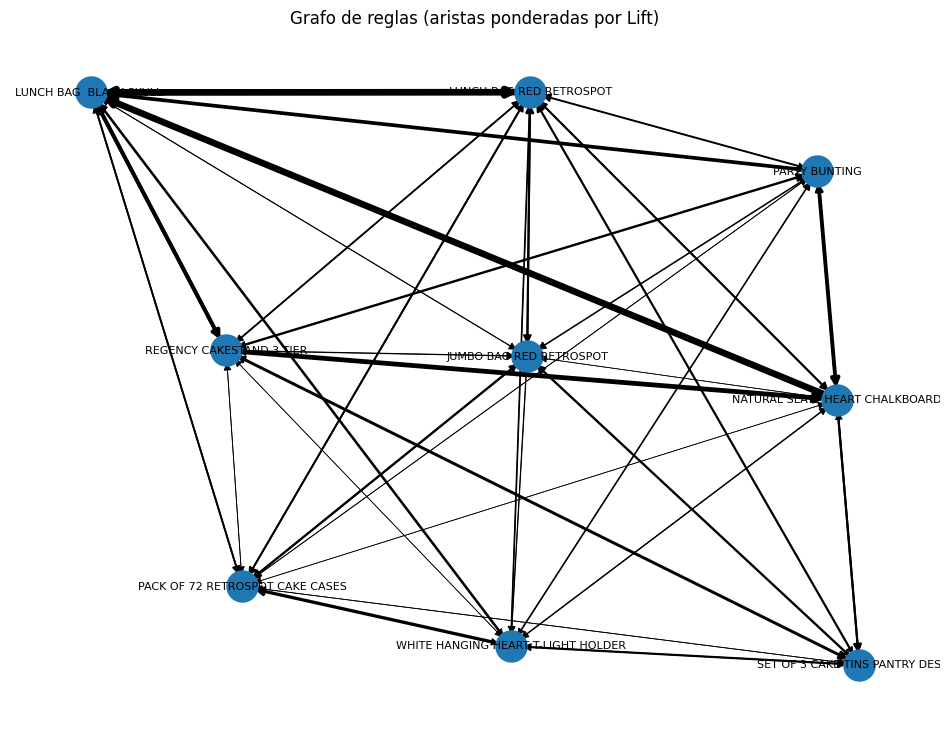

In [28]:
ejemplo4 = rules_to_graph(rules, min_conf=0.15, min_lift=1.1, max_edges=200)
plot_rules_graph(ejemplo4)

### Segmentemos clientes deacuerdo a la composicion de su compra (Basket)

In [68]:
# Creacion de matriz binaria
customer_baskets = df_clean.groupby(['CustomerID', 'Itemname'])['Quantity'].sum().unstack().fillna(0)
customer_baskets = customer_baskets.applymap(lambda x: 1 if x > 0 else 0)

C:\Users\saori\AppData\Local\Temp\ipykernel_15628\205852316.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  customer_baskets = customer_baskets.applymap(lambda x: 1 if x > 0 else 0)


In [72]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

#Reducimos la dimencion
pca = PCA(n_components=2)
basket_pca = pca.fit_transform(customer_baskets)

#Cleamos los cluster de canastas de clientes
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(customer_baskets)

#Evaluamos el cluster
sil_score = silhouette_score(customer_baskets, clusters)
print(f"\nSilhouette Score: {sil_score:.3f}")


Silhouette Score: 0.233


c:\Users\saori\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


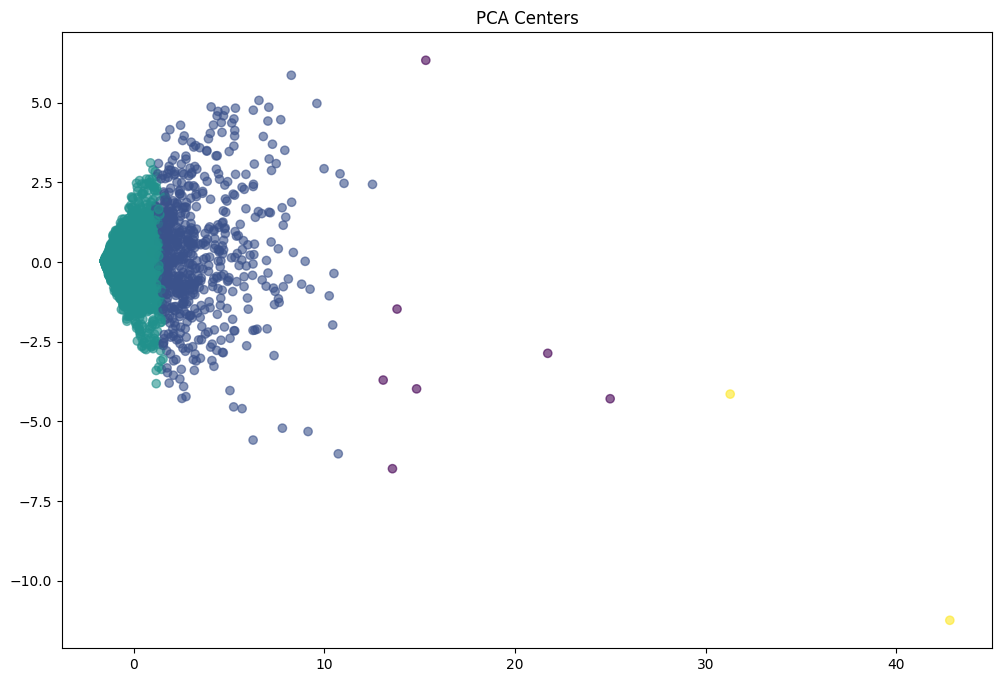

In [76]:
# Viasualizamos los resultados:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(basket_pca[:, 0], basket_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
centers = kmeans.cluster_centers_
pca_centers = pca.transform(centers)
plt.title('PCA Centers')
plt.show()

C:\Users\saori\AppData\Local\Temp\ipykernel_15628\3743453783.py:10: UserWarning: Adding colorbar to a different Figure <Figure size 1200x800 with 13 Axes> than <Figure size 640x480 with 1 Axes> which fig.colorbar is called on.
  plt.colorbar(scatter, label='Cluster')


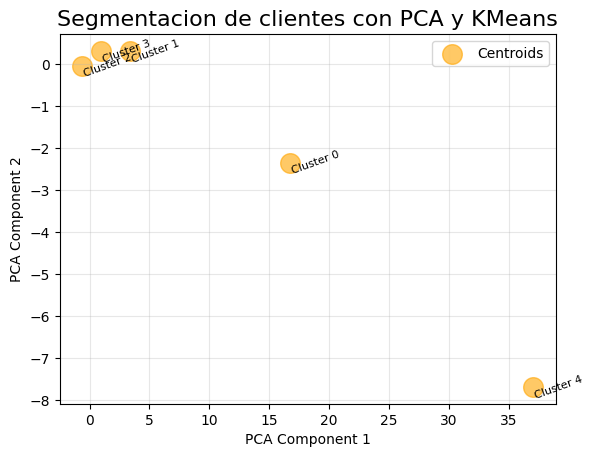

In [91]:
#Agregamos los centros de cada cluster:
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], c='orange', s=200, marker='o', label='Centroids', alpha=0.6)

for i, (x, y) in enumerate(pca_centers):
    plt.text(x, y, f'Cluster {i}', fontsize=8, ha='left', va='center', rotation=20)

plt.title('Segmentacion de clientes con PCA y KMeans', fontsize=16)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [96]:
#Analisis de los perfiles de clusters
customer_baskets['Cluster'] = clusters
cluster_profiles = customer_baskets.groupby('Cluster').mean().T
top_products_by_cluster = cluster_profiles.apply(lambda x: x.sort_values(ascending=False).head(5).index.tolist())
print("\nTop 5 productos por cluster:")
for i, products in top_products_by_cluster.items():
    print(f"Cluster {i}: {', '.join(products)}")


Top 5 productos por cluster:
Cluster 0: JUMBO BAG OWLS, FAWN BLUE HOT WATER BOTTLE, RETROSPOT HEART HOT WATER BOTTLE, FILIGRIS HEART WITH BUTTERFLY, WHITE HANGING HEART T-LIGHT HOLDER
Cluster 1: JUMBO BAG RED RETROSPOT, LUNCH BAG RED RETROSPOT, WHITE HANGING HEART T-LIGHT HOLDER, PACK OF 72 RETROSPOT CAKE CASES, REGENCY CAKESTAND 3 TIER
Cluster 2: REGENCY CAKESTAND 3 TIER, WHITE HANGING HEART T-LIGHT HOLDER, ASSORTED COLOUR BIRD ORNAMENT, PARTY BUNTING, BAKING SET 9 PIECE RETROSPOT
Cluster 3: GLASS JAR DIGESTIVE BISCUITS, GLASS JAR ENGLISH CONFECTIONERY, GIN + TONIC DIET METAL SIGN, DAISY SKETCHBOOK, I'M ON HOLIDAY METAL SIGN
Cluster 4: 200 RED + WHITE BENDY STRAWS, YULETIDE IMAGES GIFT WRAP SET, WRAP GREEN PEARS, YOU'RE CONFUSING ME METAL SIGN, 16 PIECE CUTLERY SET PANTRY DESIGN


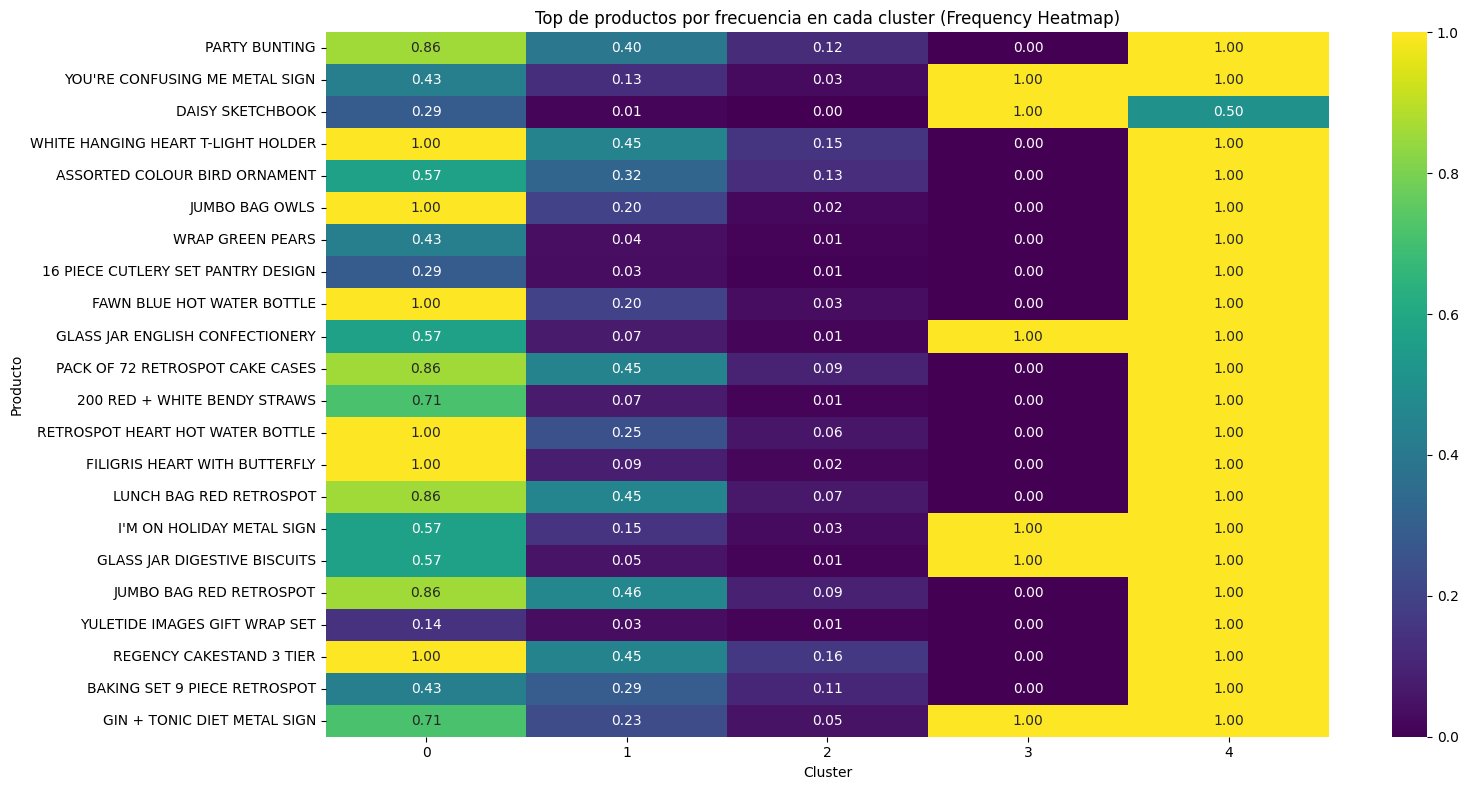

In [95]:
# Heatmap del top de productos por frecuencia en cada cluster
plt.figure(figsize=(16, 8))
top_items = list(set(sum(top_products_by_cluster.values.tolist(), [])))  
heatmap_data = cluster_profiles.loc[top_items]

sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f")
plt.title("Top de productos por frecuencia en cada cluster (Frequency Heatmap)")
plt.ylabel("Producto")
plt.xlabel("Cluster")
plt.tight_layout()
plt.show()